In [69]:
import torch


path_prefix = "../../experiments_full_16_09_2025_to_test"

dataset_names = [
    "picnn_fnlvqr_glasses",
    "picnn_fnlvqr_star",
    "picnn_fnlvqr_banana",
    "fnlvqr_glasses",
    "fnlvqr_star",
    "fnlvqr_banana",
    "funnel_1",
    "funnel_2",
    "funnel_4",
    "funnel_6",
    "funnel_8",
    "funnel_10",
    "funnel_12",
    "funnel_14",
    "funnel_16"
]

metric_names = [
    "Y_wasserstein2",
    "Y_sliced_wasserstein2",
    "Y_kde_kl_divergence",
    "Y_kde_l1_divergence",
    "U_wasserstein2",
    "U_sliced_wasserstein2",
    "U_kde_kl_divergence",
    "U_kde_l1_divergence",

    "Y|X_wasserstein2",
    "Y|X_sliced_wasserstein2",
    "Y|X_kde_kl_divergence",
    "Y|X_kde_l1_divergence",
    "U|X_wasserstein2",
    "U|X_sliced_wasserstein2",
    "U|X_kde_kl_divergence",
    "U|X_kde_l1_divergence",

    "YX_wasserstein2",
    "YX_sliced_wasserstein2",
    "YX_kde_kl_divergence",
    "YX_kde_l1_divergence",
    "UX_wasserstein2",
    "UX_sliced_wasserstein2",
    "UX_kde_kl_divergence",
    "UX_kde_l1_divergence",

    "Q^(-1)(Y,X)_uv_l2",
    "Q(U,X)_uv_l2",
]

dataset_name_to_pretty_name = {
    "picnn_fnlvqr_glasses":"Convex Glasses",
    "picnn_fnlvqr_star":"Convex Star",
    "picnn_fnlvqr_banana":"Convex Banana",
    "fnlvqr_glasses":"Glasses",
    "fnlvqr_star":"Star",
    "fnlvqr_banana":"Banana",
    "funnel_1":"$RR^{1}$",
    "funnel_2":"$RR^{2}$",
    "funnel_4":"$RR^{4}$",
    "funnel_6":"$RR^{6}$",
    "funnel_8":"$RR^{8}$",
    "funnel_10":"$RR^{10}$",
    "funnel_12":"$RR^{12}$",
    "funnel_14":"$RR^{14}$",
    "funnel_16":"$RR^{16}$",
}

metric_name_to_pretty_name = {
    "Y_wasserstein2":"Wasserstein Y",
    "Y_sliced_wasserstein2":"Sliced Wasserstein Y",
    "Y_kde_kl_divergence":"Kernel Density Estimate KL Y",
    "Y_kde_l1_divergence":"Kernel Density Estimate KL L1",
    "U_wasserstein2":"Wasserstein U",
    "U_sliced_wasserstein2":"Sliced Wasserstein U",
    "U_kde_kl_divergence":"Kernel Density Estimate KL U",
    "U_kde_l1_divergence":"Kernel Density Estimate L1 U",

    "Y|X_wasserstein2":"Wasserstein Y|X",
    "Y|X_sliced_wasserstein2":"Sliced Wasserstein Y|X",
    "Y|X_kde_kl_divergence":"Kernel Density Estimate KL Y|X",
    "Y|X_kde_l1_divergence":"Kernel Density Estimate L1 Y|X",

    "U|X_wasserstein2":"Wasserstein U|X",
    "U|X_sliced_wasserstein2":"Sliced Wasserstein U|X",
    "U|X_kde_kl_divergence":"Kernel Density Estimate KL U|X",
    "U|X_kde_l1_divergence":"Kernel Density Estimate L1 U|X",


    "YX_wasserstein2":"Wasserstein YX",
    "YX_sliced_wasserstein2":"Sliced Wasserstein YX",
    "YX_kde_kl_divergence":"Kernel Density Estimate KL YX",
    "YX_kde_l1_divergence":"Kernel Density Estimate L1 YX",

    "UX_wasserstein2":"Wasserstein UX",
    "UX_sliced_wasserstein2":"Sliced Wasserstein UX",
    "UX_kde_kl_divergence":"Kernel Density Estimate KL UX",
    "UX_kde_l1_divergence":"Kernel Density Estimate L1 UX",

    "Q^(-1)(Y,X)_uv_l2":"Unexplained Variance of Q^(-1)(Y,X)",
    "Q(U,X)_uv_l2":"Unexplained Variance of Q(U,X)"
}


model_names = [
    "E-NQR",# "EntropicNeuralQuantileRegression",
    # "C-NQR$_u$",# "NeuralQuantileRegressionU",
    # "C-NQR$_y$",# "NeuralQuantileRegressionY",
    "CA-NQR$_u$",# "AmortizedNeuralQuantileRegressionU",
    "CA-NQR$_y$",# "AmortizedNeuralQuantileRegressionY",
    "CPF",# "ConvexPotentialFlow",
    # "FN-VQR",# "Fast Non Linear Vector Quantile Regression",
    # "VQR"# "Linear Vector Quantile Regression",
]

model_name_to_idx = {
    model_name:idx
    for idx, model_name  in enumerate(model_names)
}

model_name_to_folder_name = {
    "E-NQR":"entropic_neural_quantile_regression",
    "C-NQR$_u$":"neural_quantile_regression_u",
    "C-NQR$_y$":"neural_quantile_regression_y",
    "CA-NQR$_u$":"amortized_neural_quantile_regression_u",
    "CA-NQR$_y$":"amortized_neural_quantile_regression_y",
    "CPF":"convex_potential_flow",
    "FN-VQR":"fast_non_linear_vector_quantile_regression",
    "VQR":"linear_quantile_regression",
}

dataset_name_to_metric_name_to_model_name_to_metric_mean = {
    "Y_wasserstein2":{},
    "Y_sliced_wasserstein2":{},
    "Y_kde_kl_divergence":{},
    "Y_kde_l1_divergence":{},
    "U_wasserstein2":{},
    "U_sliced_wasserstein2":{},
    "U_kde_kl_divergence":{},
    "U_kde_l1_divergence":{},

    "Y|X_wasserstein2":{},
    "Y|X_sliced_wasserstein2":{},
    "Y|X_kde_kl_divergence":{},
    "Y|X_kde_l1_divergence":{},
    "U|X_wasserstein2":{},
    "U|X_sliced_wasserstein2":{},
    "U|X_kde_kl_divergence":{},
    "U|X_kde_l1_divergence":{},

    "YX_wasserstein2":{},
    "YX_sliced_wasserstein2":{},
    "YX_kde_kl_divergence":{},
    "YX_kde_l1_divergence":{},
    "UX_wasserstein2":{},
    "UX_sliced_wasserstein2":{},
    "UX_kde_kl_divergence":{},
    "UX_kde_l1_divergence":{},

    "Q^(-1)(Y,X)_uv_l2":{},
    "Q(U,X)_uv_l2":{},
    "training_time":{}
}

dataset_name_to_model_name_to_metric_name_to_mean_and_std = {
    dataset_name:{
        model_name:{
            metric_name:{   
                "mean":None,
                "std":None,
                "samples":None,
            } for metric_name in metric_names
        } for model_name in model_names
    } for dataset_name in dataset_names
}

In [70]:
for dataset_name, model_name_to_metric_name_to_mean_and_std in dataset_name_to_model_name_to_metric_name_to_mean_and_std.items():
    for model_name, metric_name_to_mean_and_std in model_name_to_metric_name_to_mean_and_std.items():
        metric_dict = torch.load(f"{path_prefix}/{dataset_name}/{model_name_to_folder_name[model_name]}/metrics.pth")
        for metric_name in metric_name_to_mean_and_std.keys():
            try:
                metric_stack = metric_dict[metric_name]
                metric_tensor = torch.stack(metric_stack)
                metric_mean = metric_tensor.mean().item()
                metric_std = metric_tensor.std().item()
                
                dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["mean"] = metric_mean
                dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["std"] = metric_std
                dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["samples"] = metric_tensor
            except KeyError:
                print(f"Failed {dataset_name=} {model_name=} {metric_name=}, metric is not found")

Failed dataset_name='fnlvqr_glasses' model_name='E-NQR' metric_name='Q^(-1)(Y,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='E-NQR' metric_name='Q(U,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='CA-NQR$_u$' metric_name='Q^(-1)(Y,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='CA-NQR$_u$' metric_name='Q(U,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='CA-NQR$_y$' metric_name='Q^(-1)(Y,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='CA-NQR$_y$' metric_name='Q(U,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='CPF' metric_name='Q^(-1)(Y,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='CPF' metric_name='Q(U,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_star' model_name='E-NQR' metric_name='Q^(-1)(Y,X)_uv_l2', metric is not found
Failed dataset_name='fnlvq

/var/folders/rt/72m8hlc54ms0bkqzq024nm480000gp/T/ipykernel_6704/3059844608.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i * ncols + (ncols - 1)].legend(markerscale=2, bbox_to_anchor=[1.01, 1.01], loc='upper left')


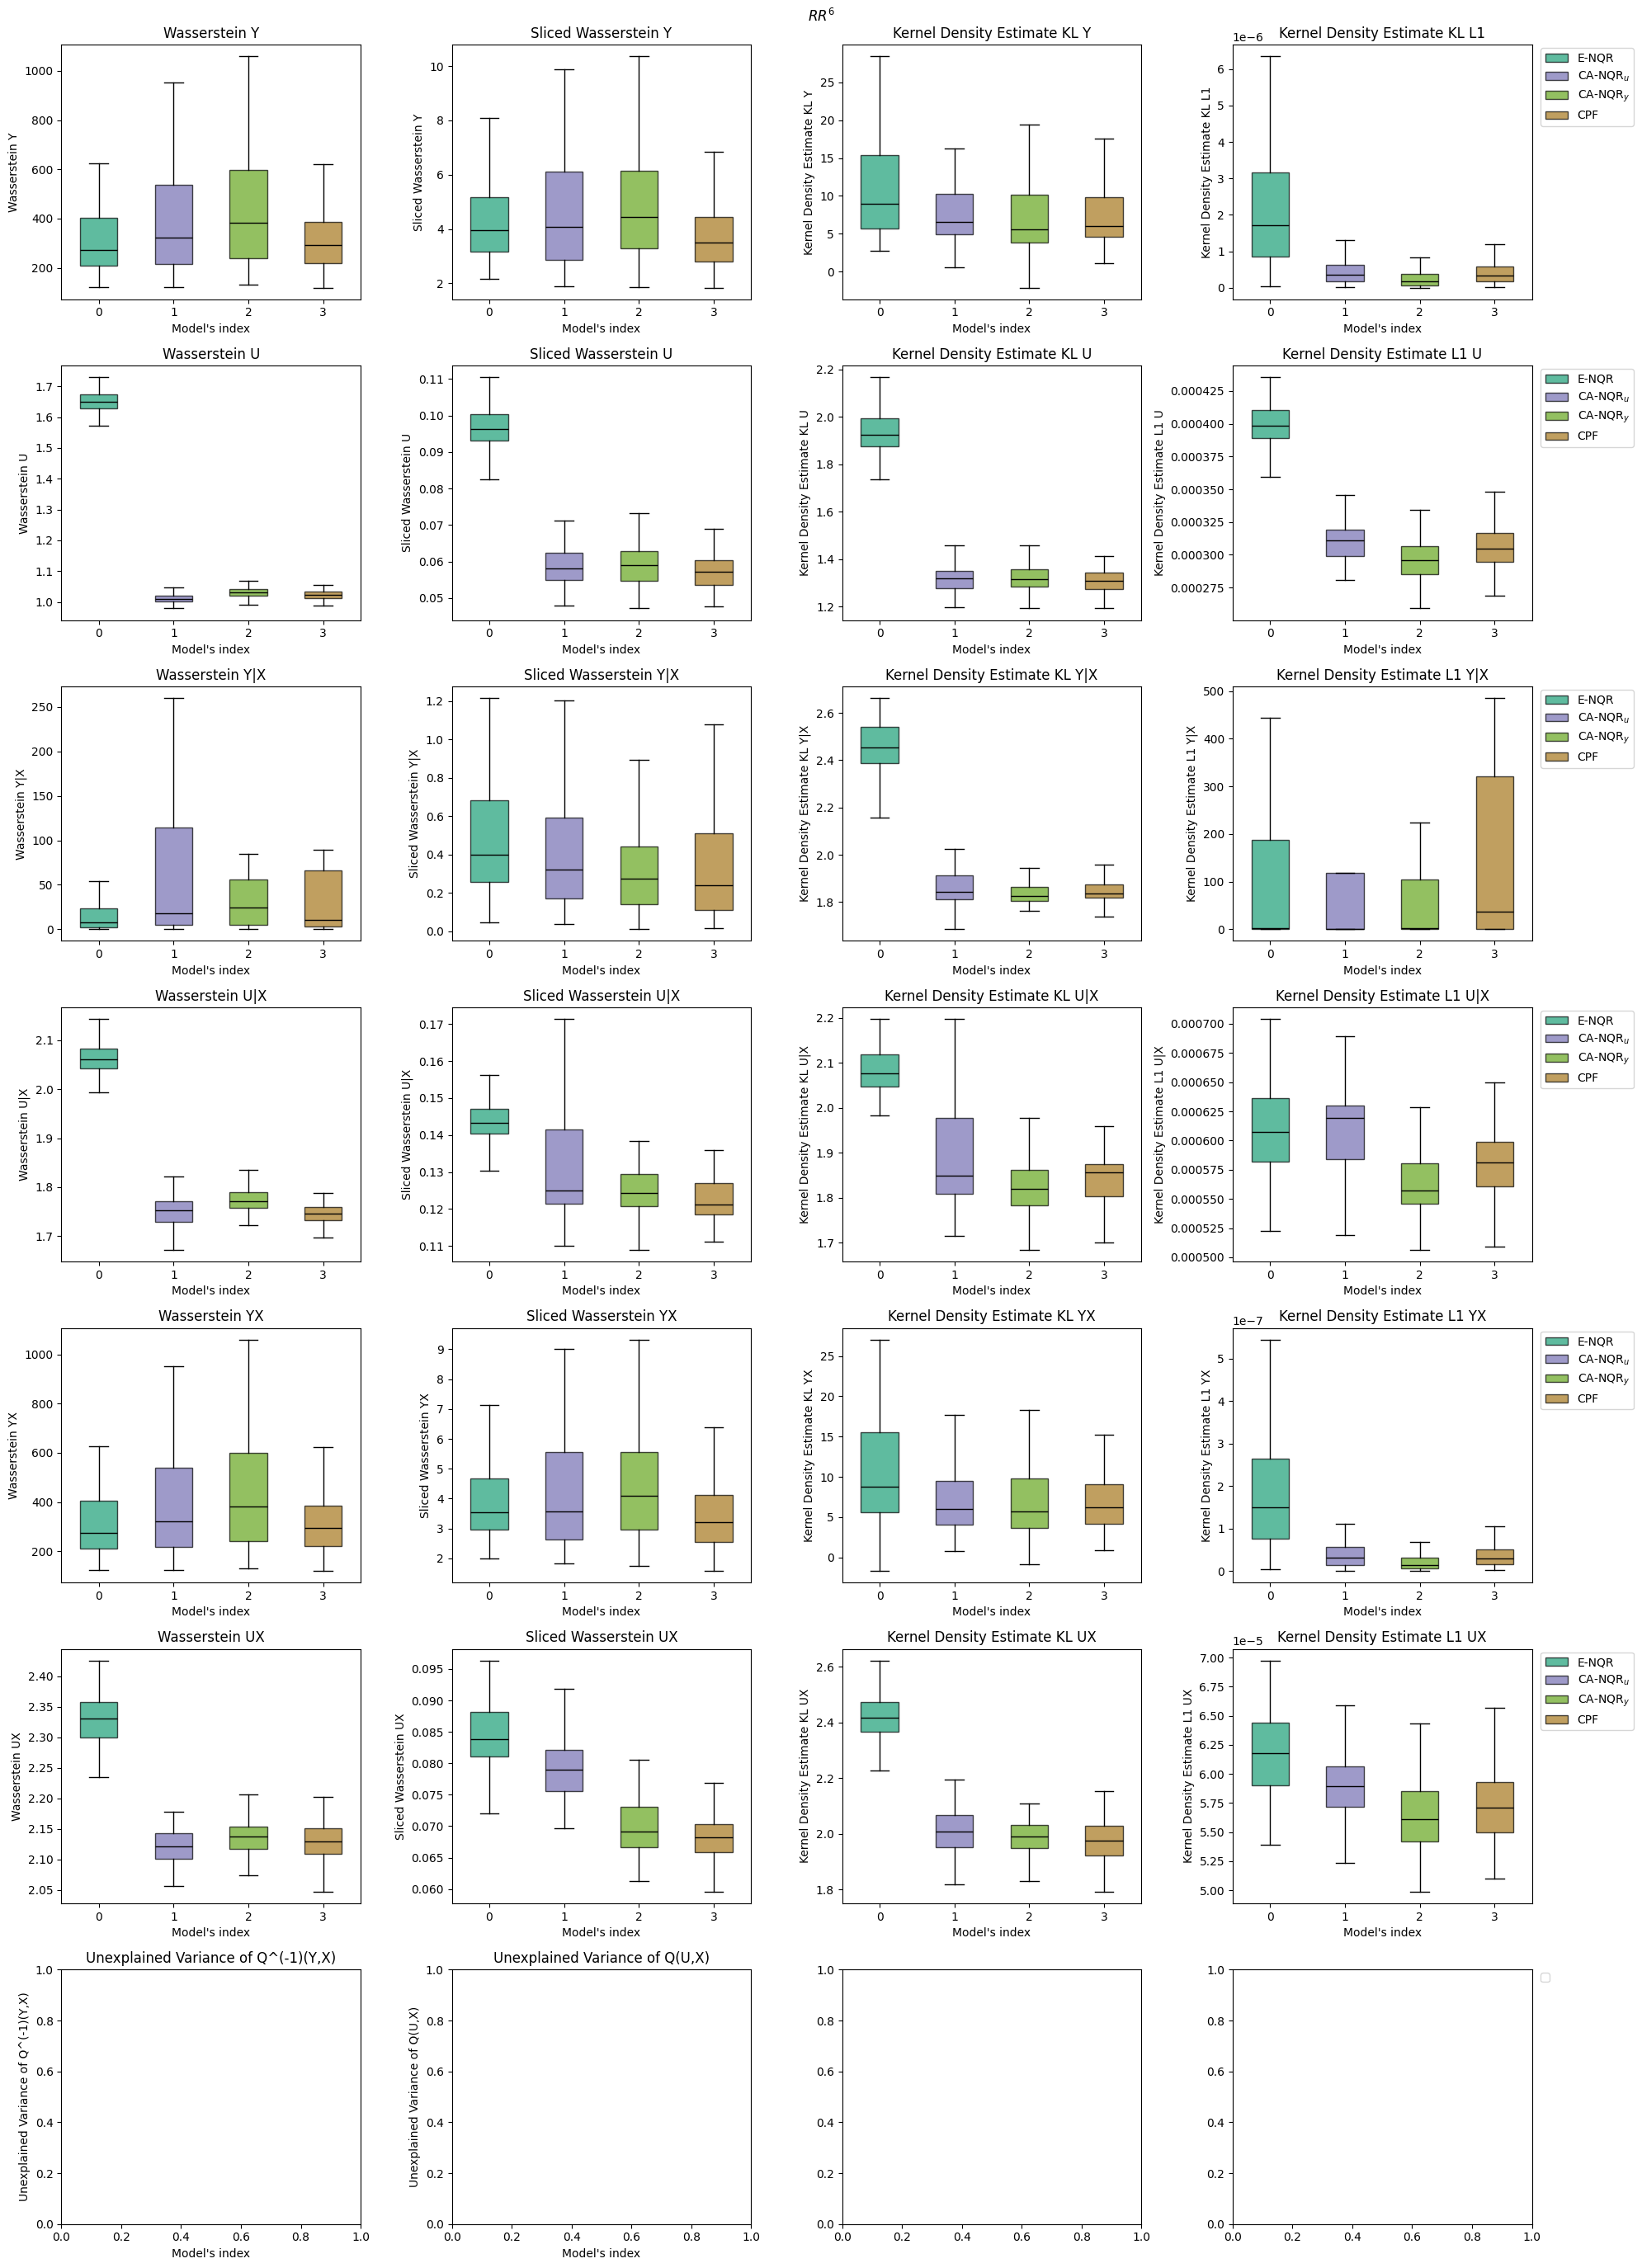

In [74]:
import matplotlib.pyplot as plt
import matplotlib
import math

dataset_name = 'funnel_6'


colors = matplotlib.colormaps['Dark2']
model_name_to_metric_name_to_mean_and_std = dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name]
number_of_metrics = len(metric_names)

ncols = 4
nrows = math.ceil(number_of_metrics / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
fig.suptitle(dataset_name_to_pretty_name[dataset_name])

axs = axs.flatten()
metric_name_to_ax = {metric_name: ax for metric_name, ax in zip(metric_names, axs)}

for metric_name, ax in metric_name_to_ax.items():
    ax.set_title(metric_name_to_pretty_name[metric_name])
    ax.set_xlabel("Model's index")
    ax.set_ylabel(metric_name_to_pretty_name[metric_name])

for model_name, metric_name_to_mean_and_std in model_name_to_metric_name_to_mean_and_std.items():
    for metric_name, ax in metric_name_to_ax.items():
        mean, std, samples = metric_name_to_mean_and_std[metric_name].values()
        # print(f"{model_name=}, {metric_name=}, {mean=}, {std=}")
        if mean is not None and std is not None:
            boxplot_color = colors(model_name_to_idx[model_name] / len(model_name_to_idx))
            ax.boxplot(
                samples,
                positions=[model_name_to_idx[model_name]],
                widths=0.5,
                patch_artist=True,
                boxprops=dict(facecolor=boxplot_color, alpha=0.7),
                medianprops=dict(color="black"),
                showfliers=False,
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                label=model_name
            )

for i in range(nrows):
    axs[i * ncols + (ncols - 1)].legend(markerscale=2, bbox_to_anchor=[1.01, 1.01], loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.99]) 
plt.show()

In [26]:
import numpy as np

metric_name_to_print = "Y|X_sliced_wasserstein2"

caption = "Sliced wasserstein-2 distance"
label = None
metric_pretty = metric_name_to_pretty_name.get(metric_name_to_print, metric_name_to_print) if metric_name_to_pretty_name else metric_name_to_print
decimal_precision = 3
bold_k = 2


def latex_escape(s: str) -> str:
    """Very small LaTeX-escape helper for underscores and percent signs (common culprits)."""
    if not isinstance(s, str):
        return str(s)
    return s.replace("\\", r"\\").replace("_", r"\_").replace("%", r"\%")


n_models = len(model_names)
col_spec = "l" + "c" * n_models
metric_title = latex_escape(metric_pretty)

rows = []
for dataset_name in dataset_names:
    row_cells = [latex_escape(dataset_name_to_pretty_name.get(dataset_name, dataset_name))]
    values_for_ranking = []
    formatted_cells = []

    for model_name in model_names:
        metric_dict = dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][
            metric_name_to_print
        ]
        values = metric_dict.get("samples")  # <-- this should be the list of observations
        values_sorted = torch.sort(values)[0]
        values_sorted = values_sorted[5:]
        values_sorted = values_sorted[:-5]

        if values is None or len(values) == 0:
            formatted = "--"
            values_for_ranking.append(float("inf"))
        else:
            values = np.array(values)
            median = np.median(values)
            q25, q75 = np.percentile(values, [25, 75])

            fmt = f"{median:.{decimal_precision}f} \\, ( {q25:.{decimal_precision}f}, {q75:.{decimal_precision}f} )"
            formatted = fmt
            values_for_ranking.append(median)

        formatted_cells.append(formatted)

    smallest_indices = sorted(range(len(values_for_ranking)), key=lambda i: values_for_ranking[i])[:bold_k]

    for i, cell in enumerate(formatted_cells):
        if cell == "--":
            wrapped = cell
        else:
            if i in smallest_indices and values_for_ranking[i] != float("inf"):
                wrapped = f"$\\mathbf{{{cell}}}$"
            else:
                wrapped = f"${cell}$"
        formatted_cells[i] = wrapped

    row_cells.extend(formatted_cells)
    rows.append(" & ".join(row_cells) + " \\\\")

# Build full table
header_models = " & ".join(latex_escape(m) for m in model_names)

table_lines = []
table_lines.append("\\begin{table}[t!]")
table_lines.append("\\centering")
if caption:
    table_lines.append(f"\\caption{{{latex_escape(caption)}}}")
table_lines.append("\\resizebox{\\textwidth}{!}{%")
table_lines.append("\\begin{tabular}{" + col_spec + "}")
table_lines.append("Dataset & " + header_models + " \\\\")
table_lines.append("\\midrule")
table_lines.extend(rows)
table_lines.append("\\bottomrule")
table_lines.append("\\end{tabular}%")
table_lines.append("}")  # end resizebox
if label:
    table_lines.append(f"\\label{{{latex_escape(label)}}}")
table_lines.append("\\end{table}")

print("\n".join(table_lines))


\begin{table}[t!]
\centering
\caption{Sliced wasserstein-2 distance}
\resizebox{\textwidth}{!}{%
\begin{tabular}{lcccccccc}
Dataset & E-NQR & C-NQR$\_u$ & C-NQR$\_y$ & CA-NQR$\_u$ & CA-NQR$\_y$ & CPF & FN-VQR & VQR \\
\midrule
Convex Glasses & $\mathbf{0.614 \, ( 0.482, 0.757 )}$ & $\mathbf{0.747 \, ( 0.595, 0.868 )}$ & $0.757 \, ( 0.500, 0.991 )$ & $0.785 \, ( 0.595, 0.992 )$ & $0.756 \, ( 0.551, 0.955 )$ & $0.766 \, ( 0.585, 0.906 )$ & $3.233 \, ( 3.168, 3.352 )$ & $3.281 \, ( 3.207, 3.431 )$ \\
Convex Star & $0.211 \, ( 0.201, 0.220 )$ & $\mathbf{0.198 \, ( 0.187, 0.208 )}$ & $\mathbf{0.199 \, ( 0.185, 0.205 )}$ & $0.203 \, ( 0.192, 0.213 )$ & $0.215 \, ( 0.203, 0.227 )$ & $0.217 \, ( 0.201, 0.228 )$ & $1.121 \, ( 1.106, 1.137 )$ & $1.124 \, ( 1.104, 1.150 )$ \\
Convex Banana & $0.101 \, ( 0.085, 0.111 )$ & $0.106 \, ( 0.086, 0.117 )$ & $\mathbf{0.077 \, ( 0.067, 0.089 )}$ & $0.079 \, ( 0.066, 0.090 )$ & $0.081 \, ( 0.064, 0.092 )$ & $\mathbf{0.075 \, ( 0.066, 0.087 )}$ & $0.851 \, 

/var/folders/rt/72m8hlc54ms0bkqzq024nm480000gp/T/ipykernel_6704/684873370.py:42: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  values = np.array(values)
